In [1]:
pwd

'/home/jegkocka88/github/Zero-Forcing-in-Graphs'

In [2]:
import networkx as nx

import searcher

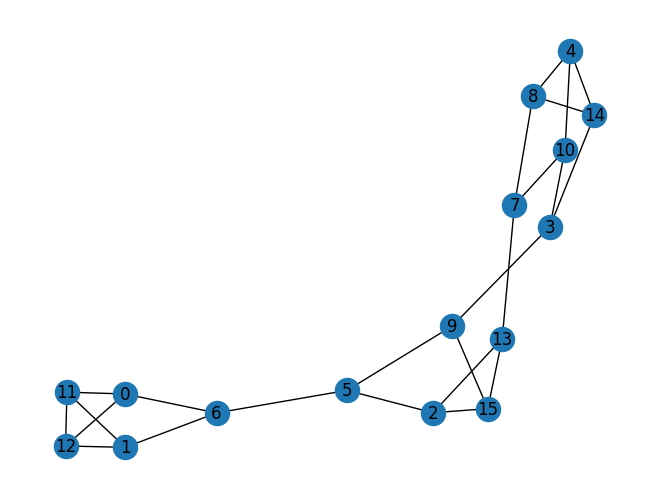

In [12]:
g = searcher.get_graph_from_path("testing/zf_16_0.375_06c7080c-1e22-4f79-ab93-93ef924760cc")
nx.draw(g, with_labels=True)

In [17]:
import datetime
import faker

In [18]:
fake = faker.Faker()

In [20]:
t0 = fake.date_time();t0

datetime.datetime(1973, 8, 27, 14, 50, 53)

In [22]:
t1 = t0 + datetime.timedelta(seconds=1);t1

datetime.datetime(1973, 8, 27, 14, 50, 54)